In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
import seaborn as sns
import csv
import random 
import sys
sys.path.append("..")
from functions import plot_mosaic
from func_job2 import *
import h5py

In [2]:
cutout_dir = os.path.expandvars("$SCRATCH") + '/'
image_dir = "/home/anahoban/projects/rrg-kyi/astro/cfis/W3/"
file_name = "confirmed_cfis_64p.h5"
scratch = os.path.expandvars('$SCRATCH') + '/'
#cutouts file
print('opening file')
hf = h5py.File(cutout_dir + file_name, "r")

opening file


In [3]:
master_cat = pd.read_csv(scratch+'master_catalogue.csv')

In [4]:
master_cat = master_cat.dropna()

In [5]:
#change those cols to strings
master_cat['TILE'].apply(str)
master_cat['BAND'].apply(str)

1         u
2         u
3         u
4         u
5         u
         ..
103596    u
103597    u
103598    u
103599    u
103600    u
Name: BAND, Length: 103599, dtype: object

In [6]:
need_fix = list(master_cat['TILE'].unique())
fixed = list(hf.keys())

In [7]:
fix_dict = {j: fixed[i] for i,j in enumerate(need_fix)}
master_cat['TILE'] = master_cat['TILE'].replace(fix_dict)

In [8]:
master_cat

,Unnamed: 0,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,...,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,ISOAREA_IMAGE,MU_MAX,FLUX_RADIUS,FLAGS,TILE,BAND,CUTOUT
1,101,102.0,8682.0068,175.7034,1.810001,-0.248942,24.6370,0.3051,24.6370,0.3051,...,0.000011,85.15,89.75,6.0,23.5522,1.619,0.0,004.180,u,c101
2,1010,1011.0,6773.0195,1870.0000,1.908508,-0.161515,24.0965,0.2219,24.0965,0.2219,...,0.000006,-90.00,-90.00,2.0,23.6126,2.422,0.0,004.180,u,c1010
3,1016,1017.0,4769.4888,1877.5187,2.011895,-0.161127,24.9089,0.4511,24.9089,0.4511,...,0.000009,-46.02,18.80,3.0,23.5518,1.410,0.0,004.180,u,c1016
4,1070,1071.0,4596.8198,1938.1915,2.020805,-0.157996,24.3398,0.3159,24.3398,0.3159,...,0.000009,43.82,44.91,5.0,22.9621,1.732,0.0,004.180,u,c1070
5,1076,1077.0,8092.9961,1941.0000,1.840395,-0.157851,24.7070,0.3882,24.7070,0.3882,...,0.000006,-90.00,-90.00,3.0,24.4147,1.734,0.0,004.180,u,c1076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103596,9724,9725.0,7504.3320,9606.3154,356.870771,0.237695,25.1215,0.2725,25.1215,0.2725,...,0.000012,45.82,44.98,1.0,23.5814,1.757,0.0,714.180,u,c9724
103597,9735,9736.0,924.3973,9668.8232,357.210310,0.240919,25.0175,0.4834,25.0175,0.4834,...,0.000016,81.07,82.30,11.0,24.0934,1.863,0.0,714.180,u,c9735
103598,9756,9757.0,1998.9895,9392.6816,357.154859,0.226671,24.6522,0.2776,24.6522,0.2776,...,0.000011,-12.98,-13.23,8.0,24.0695,2.592,0.0,714.180,u,c9756
103599,9763,9764.0,2003.9287,9628.6689,357.154604,0.238848,24.8426,0.3540,24.8426,0.3540,...,0.000015,10.83,10.65,10.0,24.1534,2.171,0.0,714.180,u,c9763


---
## Training set

In [9]:
with open('cutouts_adresses.csv', newline='') as f:
    reader = csv.reader(f)
    cutout_ids = list(reader)[0]
    
random.Random(4).shuffle(cutout_ids)
train, validate, test = np.split(cutout_ids, [int(.7*len(cutout_ids)), int(.9*len(cutout_ids))])

In [10]:
validating_tiles = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(validate)]

training_tiles   = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(train)]

testing_tiles    = master_cat.loc[(master_cat['TILE'] + ' ' + master_cat['CUTOUT']).isin(test)]

In [11]:
len(testing_tiles)+len(training_tiles)+len(validating_tiles) 

103599

In [51]:
len(testing_tiles)

10351

In [22]:
print(training_tiles['BAND'].value_counts())
#print(master_cat['TILE'].value_counts())

r    44226
u    28294
Name: BAND, dtype: int64


In [23]:
print(training_tiles[training_tiles['BAND'] == 'u']['TILE'].value_counts())
print(training_tiles[training_tiles['BAND'] == 'r']['TILE'].value_counts())

222.232    300
464.230    299
398.226    297
669.179    294
326.219    294
          ... 
014.193    266
314.228    266
661.219    265
690.181    265
329.253    257
Name: TILE, Length: 101, dtype: int64
214.269    304
163.275    302
407.242    299
197.287    298
257.285    296
          ... 
229.296    258
236.293    256
259.286    254
378.272    253
296.253    250
Name: TILE, Length: 158, dtype: int64


Text(0.5, 1.0, 'testing set')

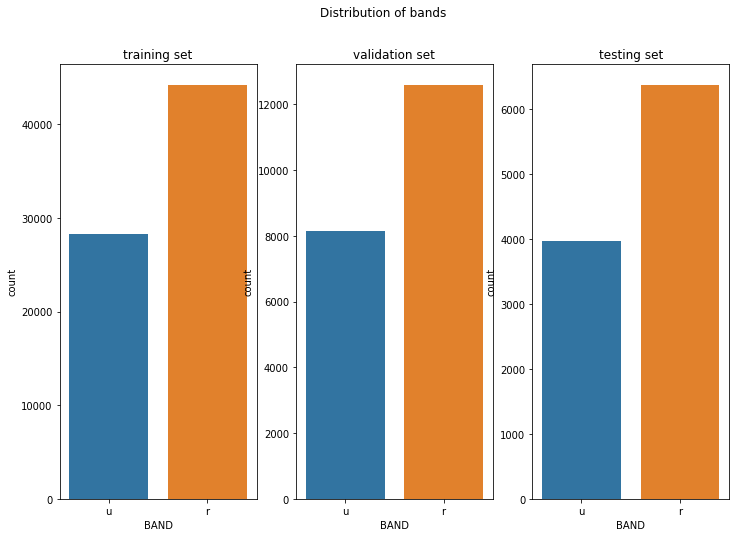

In [24]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(1,3, figsize=(12,8))
fig.suptitle('Distribution of bands')
sns.countplot(x='BAND', data =  training_tiles, ax = axes[0])
# g.set_xticklabels(g.get_xticklabels(), rotation=60)
sns.countplot(x='BAND', data = validating_tiles, ax = axes[1])
sns.countplot(x='BAND', data = testing_tiles, ax = axes[2])
axes[0].set_title('training set')
axes[1].set_title('validation set')
axes[2].set_title('testing set')

In [17]:
training_tiles.keys()

Index(['Unnamed: 0', 'NUMBER', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000',
       'DELTA_J2000', 'MAG_AUTO', 'MAGERR_AUTO', 'MAG_BEST', 'MAGERR_BEST',
       'MAG_APER', 'MAGERR_APER', 'A_WORLD', 'ERRA_WORLD', 'B_WORLD',
       'ERRB_WORLD', 'THETA_J2000', 'ERRTHETA_J2000', 'ISOAREA_IMAGE',
       'MU_MAX', 'FLUX_RADIUS', 'FLAGS', 'TILE', 'BAND', 'CUTOUT'],
      dtype='object')

In [19]:
master_cat[master_cat['BAND'] == 'u']['FLAGS'].value_counts()

0.0     36389
2.0      1813
3.0       978
17.0      424
1.0       308
16.0      289
19.0       64
24.0       61
18.0       43
35.0        9
50.0        6
51.0        6
26.0        4
8.0         2
27.0        2
32.0        1
9.0         1
Name: FLAGS, dtype: int64

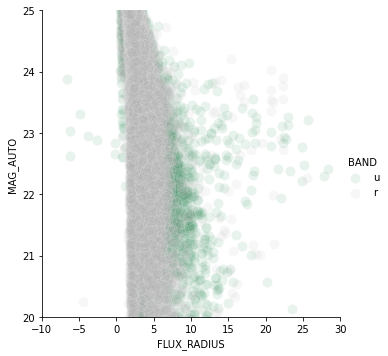

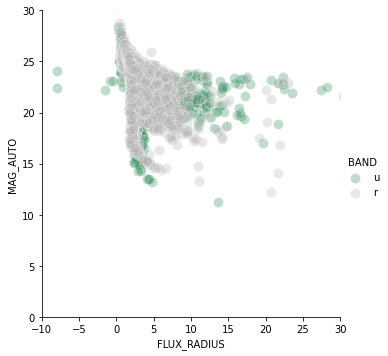

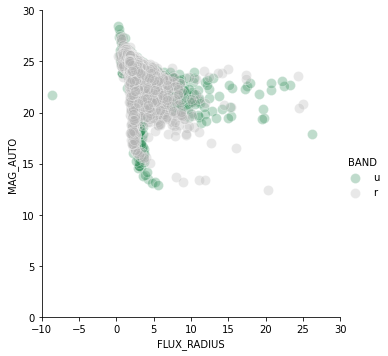

In [25]:
#matrix plot
pal = dict(u="seagreen", r=".7")

g = sns.FacetGrid(training_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.1)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(20, 25))
#g.title('training')

g = sns.FacetGrid(validating_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.3)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('validation')

g = sns.FacetGrid(testing_tiles, hue="BAND", palette=pal, height=5)
g.map(sns.scatterplot, "FLUX_RADIUS", "MAG_AUTO", s=100, alpha=.3)
g.add_legend()
g.set(xlim=(-10, 30), ylim=(0, 30))
#g.title('testing')

In [26]:
mu_train = pd.DataFrame(training_tiles,columns = ['MU_MAX'])
mu_test = pd.DataFrame(testing_tiles,columns = ['MU_MAX'])
mu_val = pd.DataFrame(validating_tiles,columns = ['MU_MAX'])

mag_train = pd.DataFrame(training_tiles,columns = ['MAG_AUTO'])
mag_test = pd.DataFrame(testing_tiles,columns = ['MAG_AUTO'])
mag_val = pd.DataFrame(validating_tiles,columns = ['MAG_AUTO'])

Text(0.5, 1.0, 'MAG_AUTO testing set')

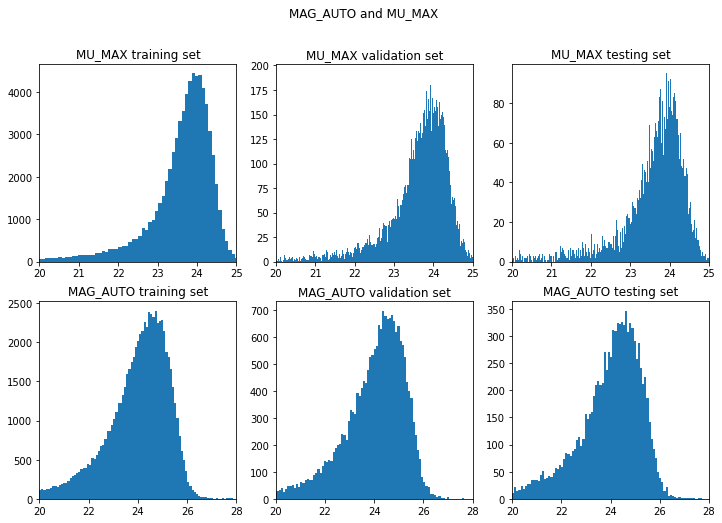

In [27]:
#plt.hist(df,bins = 1000);
#plt.xlim((20,25))

fig, axes = plt.subplots(2,3, figsize=(12,8))
fig.suptitle('MAG_AUTO and MU_MAX')


axes[0,0].hist(mu_train,bins = 1000);
axes[0,0].set_xlim((20,25))
axes[0,1].hist(mu_val,bins = 1000);
axes[0,1].set_xlim((20,25))
axes[0,2].hist(mu_test,bins = 1000);
axes[0,2].set_xlim((20,25))

axes[1,0].hist(mag_train,bins = 1000);
axes[1,0].set_xlim((20,28))
axes[1,1].hist(mag_val,bins = 1000);
axes[1,1].set_xlim((20,28))
axes[1,2].hist(mag_test,bins = 1000);
axes[1,2].set_xlim((20,28))


axes[0,0].set_title('MU_MAX training set')
axes[0,1].set_title('MU_MAX validation set')
axes[0,2].set_title('MU_MAX testing set')

axes[1,0].set_title('MAG_AUTO training set')
axes[1,1].set_title('MAG_AUTO validation set')
axes[1,2].set_title('MAG_AUTO testing set')

In [28]:
print(master_cat[master_cat['BAND'] == 'u'].describe()['MAG_AUTO'])
master_cat.describe()

count    40400.000000
mean        24.068011
std          3.874240
min         11.012700
25%         23.288375
50%         24.221300
75%         24.951600
max         99.000000
Name: MAG_AUTO, dtype: float64


,Unnamed: 0,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,...,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,ISOAREA_IMAGE,MU_MAX,FLUX_RADIUS,FLAGS
count,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,...,103599.000000,1.035990e+05,103599.000000,1.035990e+05,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000,103599.000000
mean,12475.041033,12476.041033,4945.397696,5049.260075,193.208902,35.469370,24.012251,0.421029,23.936078,0.312554,...,0.000097,1.232593e-05,0.000068,8.102172e-06,-1.072422,-0.920665,79.555546,23.471600,2.160498,0.534551
std,10852.351094,10852.351094,2893.201035,2927.612473,75.973010,18.355459,3.908649,4.825558,3.076278,3.554248,...,0.000168,5.906326e-06,0.000053,3.156475e-06,53.958449,53.981622,678.803548,1.260457,208.615000,2.620958
min,0.000000,1.000000,1.265100,1.276800,1.742213,-0.459539,10.518600,0.000000,10.518600,0.000000,...,0.000026,4.106969e-08,0.000010,1.216712e-08,-90.000000,-90.000000,0.000000,14.388200,-66970.680000,0.000000
25%,3837.500000,3838.500000,2435.623150,2519.573000,150.184849,23.947037,23.239900,0.097200,23.247550,0.092800,...,0.000053,8.618857e-06,0.000035,6.284924e-06,-45.750000,-45.080000,7.000000,23.266850,2.037000,0.000000
50%,8660.000000,8661.000000,4915.126000,5110.701700,206.304698,37.567234,24.188800,0.173200,24.192200,0.170300,...,0.000081,1.240553e-05,0.000057,8.548104e-06,-0.470000,-0.060000,18.000000,23.769100,2.620000,0.000000
75%,19778.000000,19779.000000,7453.703100,7605.591550,230.304321,51.930760,24.881200,0.247500,24.879400,0.245700,...,0.000118,1.575003e-05,0.000089,1.018066e-05,45.250000,45.020000,46.000000,24.122350,3.409000,0.000000
max,78060.000000,78061.000000,10000.000000,9999.689500,357.256868,70.683577,99.000000,248.908000,99.000000,223.015900,...,0.032449,7.650581e-05,0.005596,2.591709e-05,90.000000,90.000000,90987.000000,99.000000,818.761000,51.000000


---- 
## Residuals distributions


In [31]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

In [32]:
tile_ids = list(hf.keys())
CUTOUT_SIZE = 64

In [33]:
autoencoder_cfis = keras.models.load_model("../../Models/job14.h5", custom_objects={'MSE_with_uncertainty': MSE_with_uncertainty})

In [47]:
all_test = len(test)

In [48]:
sources_test_cfis = get_test_cutouts_shuffled(test, all_test, CUTOUT_SIZE, "cfis")
sources_test_cfis.shape

(10399, 64, 64, 4)

In [49]:
decoded_imgs_cfis = autoencoder_cfis.predict(sources_test_cfis)
residuals_cfis = sources_test_cfis - decoded_imgs_cfis

In [52]:
avg_res = np.mean(residuals_cfis[...,[0,2]].reshape(all_test,64*64*2), axis = -1)

In [58]:
np.savetxt("avg_res_job14.csv", avg_res, delimiter =", ", fmt ='% s')

In [14]:
import csv

with open('avg_res_job14.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(data)

[['-0.0019435606668594119'], ['-0.004554127503524796'], ['0.0020061367049378828'], ['0.0023131375884659633'], ['0.0035796704614767805'], ['-0.00183756523250756'], ['-0.0003609077696467011'], ['0.0013390768381214002'], ['-0.002123618388274336'], ['0.0007627317980501047'], ['-0.0021801722966756643'], ['0.0018751174880443442'], ['0.001131224245455087'], ['0.001506153480931971'], ['-0.0008038118339754874'], ['9.008667879213341e-05'], ['0.0016932088642533927'], ['0.00150887891675211'], ['0.0013125247687639785'], ['-0.0028848332217421557'], ['0.002101271253536652'], ['0.0020652962975507842'], ['-0.0002802499241170153'], ['0.0025075519342863117'], ['-0.0015681079864862113'], ['5.43021735783592e-06'], ['0.0027234869257881655'], ['0.00258293102888274'], ['0.004630096692238794'], ['0.0020230860841879417'], ['-0.0010540819800784866'], ['0.0022852480325923352'], ['0.002123912250056869'], ['0.0018497063691307837'], ['0.002079604726532125'], ['0.0022889196676863137'], ['-0.00042271147334054686'], ['

In [16]:
avg_res=data

In [ ]:
#need to find correspondance between cat_train and test

In [71]:
#define new column in training cat
testing_tiles["adress"] = testing_tiles["BAND"] + ' ' + testing_tiles['CUTOUT']

<ipython-input-71-6186175e091d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_tiles["adress"] = testing_tiles["BAND"] + ' ' + testing_tiles['CUTOUT']


In [19]:
test[0]

'051.245 c4656'

In [23]:
for i in test:
    if len(i) >= 11:
        if i[11] in ['u','r']:
            print(i)

240.293 c0-r


IndexError: string index out of range

In [73]:
#sorting the tiles
sorter = test
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))

In [66]:
tile_test = []
cut_test = []
for i in test:
    (tile, cut) = i.split(' ')
    print(tile)
    print(cut)
    tile_test.append(tile)
    cut_test.append(cut)

051.245
c4656
296.253
c8924
236.293
c26160
297.255
c13370
292.256
c18701
256.287
c33790
683.198
c191
282.233
c11293
154.285
c15933
258.285
c14809
162.275
c22424
238.293
c38142
034.210
c4604
327.231
c7525
342.271
c29840
147.288
c12751
679.187
c6189
260.251
c9505
346.224
c9530
379.259
c9030
013.214
c4149
232.294
c37480
661.219
c9002
033.219
c2244
276.255
c17969
240.293
c21764
393.245
c28209
013.214
c2686
644.204
c8999
272.283
c5649
237.291
c30243
352.253
c9376
227.295
c10708
264.267
c15664
345.236
c363
156.285
c22148
238.291
c15600
349.186
c2167
262.285
c21954
374.225
c10538
349.186
c1144
239.258
c15284
244.275
c22570
238.294
c28815
349.186
c3762
262.285
c7724
386.247
c5259
263.299
c175
659.188
c604
342.243
c19756
245.297
c26556
175.268
c20253
266.298
c30900
349.186
c8115
356.182
c4144
022.182
c9843
206.264
c18086
051.245
c15614
335.252
c10827
351.245
c24263
356.257
c5388
337.271
c32875
222.232
c10221
259.286
c35530
247.291
c939
214.269
c31691
374.225
c11243
277.286
c24641
246.291
c27671

In [69]:
len(tile_test)

10399

In [54]:
testing_tiles

,Unnamed: 0,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,MAG_BEST,MAGERR_BEST,...,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,ISOAREA_IMAGE,MU_MAX,FLUX_RADIUS,FLAGS,TILE,BAND,CUTOUT
9,1140,1141.0,3647.5242,1999.5046,2.069791,-0.154832,24.7871,0.3245,24.7871,0.3245,...,0.000010,-42.56,-69.05,3.0,22.5564,1.408,0.0,004.180,u,c1140
21,1299,1300.0,4574.5156,2136.4897,2.021956,-0.147763,24.4524,0.3332,24.4524,0.3332,...,0.000007,71.42,71.55,5.0,23.2862,2.047,0.0,004.180,u,c1299
23,1348,1349.0,8093.5786,2182.4021,1.840364,-0.145394,99.0000,99.0000,99.0000,99.0000,...,0.000008,-85.13,-84.44,16.0,24.5702,-107.325,0.0,004.180,u,c1348
39,1642,1643.0,7877.2114,2417.6028,1.851529,-0.133257,25.3972,0.7830,25.3972,0.7830,...,0.000007,71.64,71.58,4.0,23.2121,0.931,0.0,004.180,u,c1642
49,1882,1883.0,1212.5310,2690.4727,2.195442,-0.119176,25.0793,0.2746,25.0793,0.2746,...,0.000009,-35.30,48.43,4.0,22.1215,0.740,0.0,004.180,u,c1882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103542,8505,8506.0,603.8684,8540.8984,357.226850,0.182717,24.9969,0.2445,24.9969,0.2445,...,0.000014,42.86,44.89,8.0,23.8141,1.620,0.0,714.180,u,c8505
103556,8845,8846.0,1993.2198,9032.9375,357.155156,0.208107,23.7533,0.1603,23.7533,0.1603,...,0.000009,-3.35,-3.01,18.0,23.7615,5.736,0.0,714.180,u,c8845
103565,9056,9057.0,2616.3667,9338.6094,357.123001,0.223881,21.5960,0.0499,21.5960,0.0499,...,0.000006,25.34,22.07,177.0,22.6055,4.714,0.0,714.180,u,c9056
103583,9450,9451.0,7944.8110,9435.6104,356.848041,0.228886,25.4709,0.2894,25.4709,0.2894,...,0.000012,-71.67,-71.56,5.0,23.8417,1.272,0.0,714.180,u,c9450


In [84]:
sorted_cat_tile69 = master_cat[master_cat['TILE'] == '222.247'].sort_values(by = 'Unnamed: 0')

In [86]:
mu_max = pd.DataFrame(sorted_cat_tile69, columns = ['MU_MAX'])

Text(0, 0.5, 'avg pixel value')

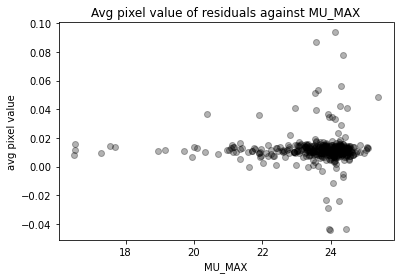

In [93]:
plt.title('Avg pixel value of residuals against MU_MAX')
plt.scatter(mu_max, avg_res, color= 'k', alpha = 0.3)
plt.xlabel('MU_MAX')
plt.ylabel('avg pixel value')